In [63]:
import os, sys
import h5py
import numpy as np
from scipy.io import loadmat
import cv2
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import matrix as mat
from sympy import *

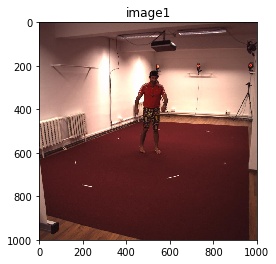

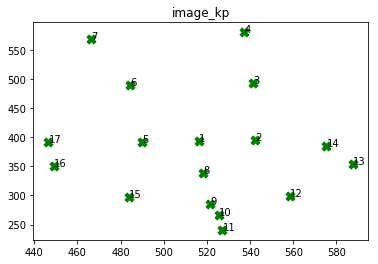

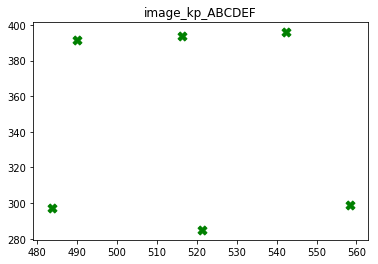

[[483.83330182 297.02895882]
 [521.42362196 285.01172463]
 [558.27002512 298.71850852]
 [490.11721691 391.47081586]
 [516.29540914 393.64693794]
 [542.46158091 395.86354434]]


In [64]:
# 数据读取
frame = 1
m = loadmat("valid.mat")
# camera intrinsic matrix
K = m["annot"][0][0][4]
K_cam = K[0][0].tolist()
# key point 3D groundtruth
gt = m["annot"][0][0][3]
img1_gt = gt[135]   # array 3 by 17
kp = np.zeros((17,2))
for i in range(17):
    u = K_cam[0] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    v = K_cam[1] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    w = K_cam[2] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    kp[i][0] = u/w
    kp[i][1] = v/w
# load  and show image
img = cv2.imread("S9_Posing_1.55011271_000676.jpg")
plt.figure("Image") # 图像窗口名称
plt.imshow(img[:,:,[2,1,0]])
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1') # 图像题目
plt.show()
# visualize key points
txt = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
img_kp = plt.scatter(kp[:,0], kp[:,1], s = 80, c = 'g', marker = 'X')
for i in range(17):
    plt.annotate(txt[i], xy = (kp[i,0], kp[i,1]), xytext = (kp[i,0]+0.1, kp[i,1]+0.1)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.axis('on') # 关掉坐标轴为 off
plt.title('image_kp') # 图像题目
# visualize ABCDEF
plt.figure()
img_kp = plt.scatter(kp[0,0], kp[0,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[1,0], kp[1,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[4,0], kp[4,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[8,0], kp[8,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[11,0], kp[11,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[14,0], kp[14,1], s = 80, c = 'g', marker = 'X')
plt.axis('on') # 关掉坐标轴为 off
plt.title('image_kp_ABCDEF') # 图像题目
plt.show()
# save 2D coordinate to list
x2d = np.zeros((6 * frame,2))
x2d[0,0] = kp[0,0]
for i in range(6):
    for j in range(frame):
        if i==0 :
            x2d[i*frame+j, 0] = kp[14, 0]
            x2d[i*frame+j, 1] = kp[14, 1]
        elif i==1 :
            x2d[i*frame+j, 0] = kp[8, 0]
            x2d[i*frame+j, 1] = kp[8, 1]
        elif i==2 :
            x2d[i*frame+j, 0] = kp[11, 0]
            x2d[i*frame+j, 1] = kp[11, 1]
        elif i==3 :
            x2d[i*frame+j, 0] = kp[4, 0]
            x2d[i*frame+j, 1] = kp[4, 1]
        elif i==4 :
            x2d[i*frame+j, 0] = kp[0, 0]
            x2d[i*frame+j, 1] = kp[0, 1]
        elif i==5 :
            x2d[i*frame+j, 0] = kp[1, 0]
            x2d[i*frame+j, 1] = kp[1, 1]
print(x2d)

In [65]:
def getFx(para, frame):   # para中为(13*frame+3)的一套参数，frame传进来是为了确定循环次数
    #先写出参数表达式，ABDCDEF六个点的齐次坐标
    K = Matrix([[1149.67569986785, 0.0, 508.848621645943],
                     [0.0, 1147.59161666764, 508.064917088557],
                     [0.0, 0.0, 1.0]])
    r11, r12, r13, r14, r21, r22, r23, r24, r31, r32, r33 = symbols('r11 r12 r13 r14 r21 r22 r23 r24 r31 r32 r33')
    Rt = Matrix([[r11, r12, r13, r14], [r21, r22, r23, r24], [r31, r32, r33, 1]])
    a, b, c, th, al = symbols('a b c th al')
    ua, va, wa, ub, vb, wb, uc, vc, wc, ud, vd, wd, ue, ve, we, uf, vf, wf = symbols('ua va wa ub vb wb uc vc wc ud vd wd ue ve we uf vf wf')
    f = Symbol('f')
    XA = Matrix([[-a * c * cos(th) * cos(al)], [c-a * c * sin(th)], [-a * c *  cos(th) * sin(al)], [1]])
    XB = Matrix([[0], [c], [0], [1]])
    XC = Matrix([[a * c * cos(th) * cos(al)], [c+a * c * sin(th)], [a * c * cos(th) * sin(al)], [1]])
    XD = Matrix([[-b * c], [0], [0], [1]])
    XE = Matrix([[0], [0], [0], [1]])
    XF = Matrix([[b * c], [0], [0], [1]])
    ua, va, wa = K[0,:] * (Rt * XA), K[1,:] * (Rt * XA), K[2,:] * (Rt * XA)
    ub, vb, wb = K[0,:] * (Rt * XB), K[1,:] * (Rt * XB), K[2,:] * (Rt * XB)
    uc, vc, wc = K[0,:] * (Rt * XC), K[1,:] * (Rt * XC), K[2,:] * (Rt * XC)
    ud, vd, wd = K[0,:] * (Rt * XD), K[1,:] * (Rt * XD), K[2,:] * (Rt * XD)
    ue, ve, we = K[0,:] * (Rt * XE), K[1,:] * (Rt * XE), K[2,:] * (Rt * XE)
    uf, vf, wf = K[0,:] * (Rt * XF), K[1,:] * (Rt * XF), K[2,:] * (Rt * XF)
    #根据每一帧的循环，提取出Rt的参数，K是公用的，代入参数写出3D坐标，并计算出u/w，v/w
    #写成f的形式，即按照六个点分块，每块里面有M帧
    getfx = mat(np.zeros((6*frame*2,1)))
    for i in range(6):
        for j in range(frame):
            if i == 0 :
                f = Matrix([ua/wa, va/wa])
            elif i == 1 :
                f = Matrix([ub/wb, vb/wb])
            elif i == 2 :
                f = Matrix([uc/wc, vc/wc])
            elif i == 3 :
                f = Matrix([ud/wd, vd/wd])
            elif i == 4 :
                f = Matrix([ue/we, ve/we])
            else:
                f = Matrix([uf/wf, vf/wf])
            f_value = f.subs({r11:para[13*j], r12:para[13*j+1], r13:para[13*j+2], r14:para[13*j+3], 
                        r21:para[13*j+4], r22:para[13*j+5], r23:para[13*j+6], r24:para[13*j+7], 
                        r31:para[13*j+8], r32:para[13*j+9], r33:para[13*j+10], th:para[13*j+11], 
                        al:para[13*j+12], a:para[-3], b:para[-2], c:para[-1]})
            getfx[i*frame*2+j*2] = f_value[0]
            getfx[i*frame*2+j*2+1] = f_value[1]
    #返回getfx值，2*frame*6 by 1
    return getfx

In [66]:
# parameter initialization for all frame (K_cam, x2d(6*frame by 2))
# x_para(13*frame+3)
x_para = np.zeros((13*frame+3,1))
for i in range(frame):
    x_para[13*i] = -1   # r11
    x_para[13*i+5] = 1   # r22
    x_para[13*i+10] = -1   # r33
    x_para[13*i+3] = 0.0047
    x_para[13*i+7] = -0.0997
    x_para[13*i+11] = 0   # th
    x_para[13*i+12] = 0   #al
x_para[-3] = 0.35   # a
x_para[-2] = 0.25   # b
distance = -0.095#0.096   # c
x_para[-1] = distance
print(mat(x_para.copy()))
getfx_ini = getFx(x_para, frame)
print(getfx_ini)

[[-1.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0047]
 [ 0.    ]
 [ 1.    ]
 [ 0.    ]
 [-0.0997]
 [ 0.    ]
 [ 0.    ]
 [-1.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.35  ]
 [ 0.25  ]
 [-0.095 ]]
[[476.02538041]
 [284.62882932]
 [514.25209744]
 [284.62882932]
 [552.47881446]
 [284.62882932]
 [486.94729956]
 [393.65003291]
 [514.25209744]
 [393.65003291]
 [541.55689531]
 [393.65003291]]


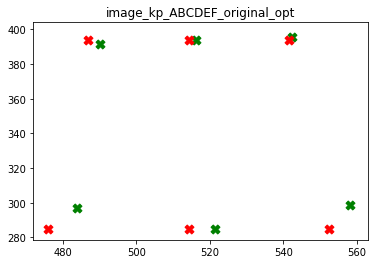

In [72]:
plt.figure()
img_kp = plt.scatter(kp[14,0], kp[14,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[0,0], getfx_ini[1,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[8,0], kp[8,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[2,0], getfx_ini[3,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[11,0], kp[11,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[4,0], getfx_ini[5,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[4,0], kp[4,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[6,0], getfx_ini[7,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[0,0], kp[0,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[8,0], getfx_ini[9,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[1,0], kp[1,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_ini[10,0], getfx_ini[11,0], s = 80, c = 'r', marker = 'X')
plt.axis('on') # 关掉坐标轴为 off
plt.title('image_kp_ABCDEF_original_opt') # 图像题目
plt.show()

In [83]:
def getJacobian(point, frame, para):
    # 用参数表示K，R矩阵
    focalx, focaly, px, py = symbols('focalx focaly px py')
    r11, r12, r13, r14, r21, r22, r23, r24, r31, r32, r33 = symbols('r11 r12 r13 r14 r21 r22 r23 r24 r31 r32 r33')
    Rt = Matrix([[r11, r12, r13, r14], [r21, r22, r23, r24], [r31, r32, r33, 1]])
    K = Matrix([[focalx, 0, px], [0, focaly, py], [0, 0, 1]])
    # KRt = K * Rt
    # 用参数表示ABCDEF六个点坐标
    a, b, c, th, al = symbols('a b c th al')
    ua, va, wa, ub, vb, wb, uc, vc, wc, ud, vd, wd, ue, ve, we, uf, vf, wf = symbols('ua va wa ub vb wb uc vc wc ud vd wd ue ve we uf vf wf')
    f = Symbol('f')
    if point == 0 :
        XA = Matrix([[-a * c * cos(th) * cos(al)], [c-a * c * sin(th)], [-a * c *  cos(th) * sin(al)], [1]])
        ua, va, wa = K[0,:] * (Rt * XA), K[1,:] * (Rt * XA), K[2,:] * (Rt * XA)
        f = Matrix([ua/wa, va/wa])
    elif point == 1 :
        XB = Matrix([[0], [c], [0], [1]])
        ub, vb, wb = K[0,:] * (Rt * XB), K[1,:] * (Rt * XB), K[2,:] * (Rt * XB)
        f = Matrix([ub/wb, vb/wb])
    elif point == 2 :
        XC = Matrix([[a * c * cos(th) * cos(al)], [c+a * c * sin(th)], [a * c * cos(th) * sin(al)], [1]])
        uc, vc, wc = K[0,:] * (Rt * XC), K[1,:] * (Rt * XC), K[2,:] * (Rt * XC)
        f = Matrix([uc/wc, vc/wc])
    elif point == 3 :
        XD = Matrix([[-b * c], [0], [0], [1]])
        ud, vd, wd = K[0,:] * (Rt * XD), K[1,:] * (Rt * XD), K[2,:] * (Rt * XD)
        f = Matrix([ud/wd, vd/wd])
    elif point == 4 :
        XE = Matrix([[0], [0], [0], [1]])
        ue, ve, we = K[0,:] * (Rt * XE), K[1,:] * (Rt * XE), K[2,:] * (Rt * XE)
        f = Matrix([ue/we, ve/we])
    elif point == 5:
        XF = Matrix([[b * c], [0], [0], [1]])
        uf, vf, wf = K[0,:] * (Rt * XF), K[1,:] * (Rt * XF), K[2,:] * (Rt * XF)
        f = Matrix([uf/wf, vf/wf])
    args = Matrix([r11, r12, r13, r14, r21, r22, r23, r24, r31, r32, r33, th, al, a, b, c])
    f_X1 = f[0,:].jacobian(args)
    f_X2 = f[1,:].jacobian(args)
    JA = Matrix([f_X1, f_X2])   # 2 by 16 matrix
    JA_value = JA.subs({focalx:1149.676, focaly:1147.592, px:508.849, py:508.065, r11:para[13*frame], r12:para[13*frame+1], 
                                 r13:para[13*frame+2], r14:para[13*frame+3], r21:para[13*frame+4], r22:para[13*frame+5], 
                                 r23:para[13*frame+6], r24:para[13*frame+7], r31:para[13*frame+8], r32:para[13*frame+9], 
                                 r33:para[13*frame+10], th:para[13*frame+11], al:para[13*frame+12], a:para[-3], b:para[-2], c:para[-1]})
    #JA_value = JA_value.subs({f:1149.68})
    return JA_value

In [93]:
def getJ(para, frame):
    getj = mat(np.zeros((6*frame*2, 13*frame+3)))
    for m in range(6):
        for n in range(frame):
            JA_value = getJacobian(m, n, para)
            #print(JA_value)
            getj[2*(m*frame+n):2*(m*frame+n+1), 13*n:13*n+13] = JA_value[:, 0:13]
            getj[2*(m*frame+n):2*(m*frame+n+1), -3:] = JA_value[:, -3:]
    return getj

In [100]:
# calculate Jacobian Matrix

J = mat(np.zeros((6*frame*2, 13*frame+3)))
for i in range(6):
    for j in range(frame):
        JA_value = getJacobian(i, j, x_para)
        #print(JA_value)
        J[2*(i*frame+j):2*(i*frame+j+1), 13*j:13*j+13] = JA_value[:, 0:-3]
        J[2*(i*frame+j):2*(i*frame+j+1), -3:] = JA_value[:, -3:]
H = J.T * J
#print(H)
print(H[15,15])   # 6*frame*2 by 13*frame+3 matrix


4439951.510233121


In [109]:
#dx = -(J.T * J + u * mat(np.eye(13*frame+3))).I * J.T * E
u = 2.2
print(u * mat(np.eye(13*frame+3)))

[[2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.2 

In [111]:
J = mat(np.zeros((6*frame*2, 13*frame+3)))
E = mat(np.zeros((6*frame*2,1)))   # E = f(X) - b ;
E_temp = mat(np.zeros((6*frame*2,1)))   # E_temp compare with E in L-M
x_k = mat(x_para.copy())   #parameter initialization
step = 0   # iteration steps
mse_last = 0   # mse value after iteration each time
step_max = 500   # maximum number of iteration
u = 1
v = 2   # u, v initial value
# L-M Algorithm obtain optimal parameters
while(step < step_max):
    step += 1
    mse, mse_temp = 0, 0
    
    # generate Jacobian Matrix and calculate E
    getfx = mat(np.zeros((6*frame*2,1)))
    getfx = getFx(x_k, frame)
    for i in range(6):
        for j in range(frame):
            if i==0 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==1 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==2 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==3 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==4 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==5 :
                E[(i*frame+j)*2] = getfx[i*frame*2+j*2] - x2d[i,0]
                E[(i*frame+j)*2+1] = getfx[i*frame*2+j*2+1] - x2d[i, 1]
    for i in range(6*frame*2):
        mse += E[i]**2
    mse /= 6*frame*2
    
    # get new J
    J = mat(np.zeros((6*frame*2, 13*frame+3)))
    J = getJ(x_k, frame)
    '''
    J = mat(np.zeros((6*frame*2, 13*frame+3)))
    for i in range(6):
        for j in range(frame):
            JA_value = getJacobian(i, j, x_k)
            J[2*(i*frame+j):2*(i*frame+j+1), 13*j:13*j+13] = JA_value[:,0:13]
            J[2*(i*frame+j):2*(i*frame+j+1), -3:] = JA_value[:, -3:]
    '''
    # delta X = ...
    #print(J.T * J)
    dx = mat(np.zeros((13*frame+3,1)))
    #print(u)
    LM = u * mat(np.eye(13*frame+3))
    #print(LM)
    dx = -(J.T * J + LM).I * J.T * E
    x_k_temp = x_k.copy()
    x_k_temp += dx
    print(dx)
    # calculate E_temp with x_k_temp
    # copy from E with x_k
    getfx_temp = mat(np.zeros((6*frame*2,1)))
    getfx_temp = getFx(x_k_temp, frame)
    for i in range(6):
        for j in range(frame):
            if i==0 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==1 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==2 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==3 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==4 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
            elif i==5 :
                E_temp[(i*frame+j)*2] = getfx_temp[i*frame*2+j*2] - x2d[i,0]
                E_temp[(i*frame+j)*2+1] = getfx_temp[i*frame*2+j*2+1] - x2d[i, 1]
    for i in range(6*frame*2):
        mse_temp += E_temp[i]**2
    mse_temp /= 6*frame*2
    
    # segma value to choose optimization model
    segma = (mse - mse_temp)/((dx.T * (u * dx - J.T * E))[0,0])
    
    # calculate new u
    if segma > 0:
        s = 1.0/3.0
        v = 2
        x_k = x_k_temp
        mse = mse_temp
        u = u * max(s, 1-pow(2*segma,3))
    else:
        u = u * v
        v = v * 2
        x_k = x_k_temp
    u = u[0,0]
    print("step = %d, abs(mse-mse_last) = %.8f" %(step, abs(mse-mse_last)))
    if abs(mse-mse_last)<0.000001:
        break    
    mse_last = mse
    
print("step = ", step)
print("mse = ", mse_last)
print("parameter = ", x_k)

1
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[-6.82465957e-03]
 [-4.58141176e-02]
 [ 0.00000000e+00]
 [ 1.80778872e-03]
 [-7.15018999e-02]
 [-7.49634212e-03]
 [ 0.00000000e+00]
 [ 9.08225591e-06]
 [-9.00410961e-02]
 [-7.53459

step = 4, abs(mse-mse_last) = 0.00003550
0.9796937561233496
[[0.97969376 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.97969376 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.97969376 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.97969376 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.97969376 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.97969376
  0.         0.         0.         0.

step = 7, abs(mse-mse_last) = 0.00000059
step =  7
mse =  [[9.19796875]]
parameter =  [[-1.01467586e+00]
 [-4.88074208e-02]
 [-5.99477379e-04]
 [ 6.47967046e-03]
 [-8.35804329e-02]
 [ 9.92147757e-01]
 [-9.48486871e-04]
 [-9.96904449e-02]
 [-1.72131482e-02]
 [ 3.03110424e-03]
 [-9.96237947e-01]
 [ 7.40954851e-02]
 [ 5.27034975e-02]
 [ 3.63567383e-01]
 [ 2.55433593e-01]
 [-8.78429471e-02]]


In [112]:
# visualize keypoint after BA
# compare with image_kp_ABCDEF
print(x_k)

[[-1.01467586e+00]
 [-4.88074208e-02]
 [-5.99477379e-04]
 [ 6.47967046e-03]
 [-8.35804329e-02]
 [ 9.92147757e-01]
 [-9.48486871e-04]
 [-9.96904449e-02]
 [-1.72131482e-02]
 [ 3.03110424e-03]
 [-9.96237947e-01]
 [ 7.40954851e-02]
 [ 5.27034975e-02]
 [ 3.63567383e-01]
 [ 2.55433593e-01]
 [-8.78429471e-02]]


In [113]:
getfx_final = getFx(x_k, frame)
print(getfx_final)

[[483.92963796]
 [292.75058436]
 [521.23054357]
 [293.58762917]
 [558.3667673 ]
 [294.42097848]
 [490.11585197]
 [391.46379191]
 [516.29814132]
 [393.66099827]
 [542.46021374]
 [395.85650802]]


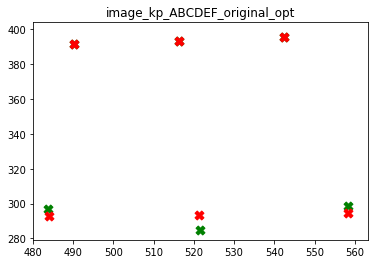

In [114]:
plt.figure()
img_kp = plt.scatter(kp[14,0], kp[14,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[0,0], getfx_final[1,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[8,0], kp[8,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[2,0], getfx_final[3,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[11,0], kp[11,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[4,0], getfx_final[5,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[4,0], kp[4,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[6,0], getfx_final[7,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[0,0], kp[0,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[8,0], getfx_final[9,0], s = 80, c = 'r', marker = 'X')
img_kp = plt.scatter(kp[1,0], kp[1,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(getfx_final[10,0], getfx_final[11,0], s = 80, c = 'r', marker = 'X')
plt.axis('on') # 关掉坐标轴为 off
plt.title('image_kp_ABCDEF_original_opt') # 图像题目
plt.show()